# DBSCAN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN

### Exemplo 1: Make moon

In [2]:
from sklearn.datasets import make_moons

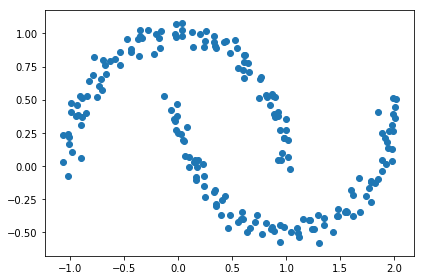

In [3]:
# Gerando os dados
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
plt.scatter(X[:,0], X[:,1])
plt.tight_layout()
plt.show()

In [4]:
# Construção do modelo
modelo = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')

In [5]:
# Fit dos dados
y_db = modelo.fit_predict(X)

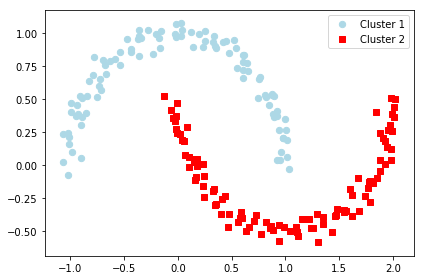

In [6]:
# Plot
plt.scatter(X[y_db==0,0], X[y_db==0,1], c = 'lightblue', marker = 'o', s = 40, label = 'Cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], c = 'red', marker = 's', s = 40, label = 'Cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

### Exemplo 2: Iris Dataset

**Trabalhando os dados**

In [7]:
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()
X = iris.data
y = iris.target

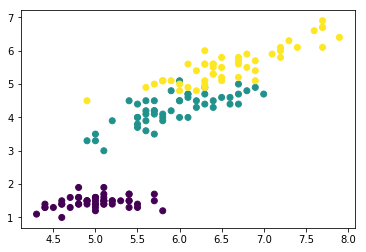

In [9]:
# Dataset Slicing
x_axis = iris.data[:, 0]  # Sepal Length
y_axis = iris.data[:, 2]  # Sepal Width

plt.scatter(x_axis, y_axis, c=iris.target)
plt.show()

**Treinando o modelo**

In [10]:
dbscan = DBSCAN()

In [11]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

**Plotando o resultado**

O Iris dataset possui 4 dimensões, portanto para mostrarmos o resuiltado em um scatterplot, faremos uma redução de dimensionalidade para 2 eixos utilizando o o PCA

In [12]:
# Reduzindo a Dimensionalidade usando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

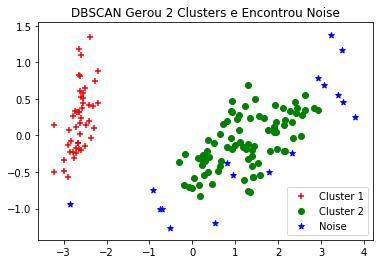

In [13]:
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN Gerou 2 Clusters e Encontrou Noise')
plt.show()

Nota: O DBSCAN encontrou somente 2 cluster para o Iris Dataset. Sabemos que essa base possui 3 diferentes tipos de flores, demosntrando que nesse caso esse algoritmo não é o mais indicado. O k-means talvez gere um melhor resultado.

### Exemplo 3: Wholesale customers Data Set
Fonte: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers  

O conjunto de dados refere-se aos clientes de um distribuidor por atacado. Inclui o gasto anual em unidades monetárias (m.u.) em diversas categorias de produtos.

Descrição:  
7)	CHANNEL: Canal de clientes - Horeca (Hotel / Restaurante / Café) ou canal de varejo (Nominal);  
8)	REGION: clientes Região Lisboa, Porto ou Outro (Nominal);  
1)	FRESH: gasto anual (m.u.) em produtos frescos (Contínuo);  
2)	MILK: gasto anual (m.u.) em produtos lácteos (Contínuo);  
3)	GROCERY: gasto anual (m.u.) em produtos de mercearia (Contínuo);  
4)	FROZEN: gastos anuais (m.u.) em produtos congelados (Contínuo);  
5)	DETERGENTS_PAPER: gasto anual (m.u.) em detergentes e produtos de papel (Contínuo);  
6)	DELICATESSEN: gastos anuais (m.u.) em produtos de charcutaria - embutidos - (Contínuo);  

Com o DBSCAN iremos identificar os clientes com hábitos de compra anuais mais incomuns (outliers).

**Trabalhando os dados**

In [14]:
# Importando o CSV e verificando as primeiras linhas
sales = pd.DataFrame(pd.read_csv('datasets/Wholesale customers data.csv'))

sales.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Vamos descartar as colunas Channel e Region, pois se tratam somente de atributos que descrevem o tipo de cliente e a região em que se encontram.

In [15]:
# Descartando as colunas Channel e Region
sales.drop(['Channel', 'Region'], axis=1, inplace=True)

Verificando o tipo e a consistência dos dados

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


Podemos ver que todos os dados são numéricos e não há valores missing.

In [17]:
sales.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Os dados estão em milhar, poderíamos aplicar uma normalização, porém vamos manter dessa forma. Vamos aplicar somente uma redução de dimensionalidade, para melhor visualizarmos os dados.

In [18]:
from sklearn.decomposition import PCA

In [19]:
# Instanciando o PCA para 2 dimensões
pca = PCA(n_components = 2)

# Transformando os dados
sales_2d = pd.DataFrame(pca.fit_transform(sales))

# Renomenado as colunas
sales_2d.rename(columns={0: 'x', 1: 'y'}, inplace=True)

# Verificando o resultado
sales_2d.head()

,x,y
0,650.022122,1585.519090
1,-4426.804979,4042.451509
2,-4841.998707,2578.762176
3,990.346437,-6279.805997
4,10657.998731,-2159.725815


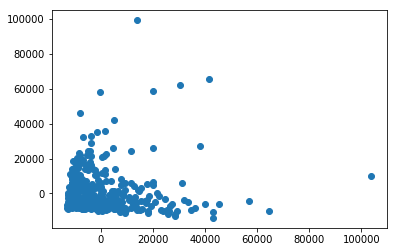

In [20]:
# Plotando os valores
plt.scatter(sales_2d['x'],sales_2d['y']);

Visualmente podemos notar no gráfico de dispersão acima que há clientes com hábitos de compra anuais mais incomuns. Vamos então utilizar o DBSCAN para classificá-los.

**Aplicando o algoritmo**

In [21]:
# Instanciando o modelo
dbscan = DBSCAN(eps = 10000, min_samples = 15)

# Aplicando o algoritmo
dbscan.fit(sales_2d)

# Verificando os rótulos
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

**Plotando o resultado**

In [22]:
# Agragando os rótulos à base de clientes
salesGroup = sales_2d
salesGroup['labels'] = dbscan.labels_
salesGroup[salesGroup.labels < 0]        # Mostrando os clientes com comportamento diferenciado

,x,y,labels
23,19941.088236,26312.654602,-1
47,41411.316307,65788.297886,-1
61,30398.840706,62369.372900,-1
65,-8087.406588,45950.839086,-1
85,13653.677411,99226.734125,-1
86,19878.456633,58470.624538,-1
103,45183.311101,-6064.936093,-1
125,64420.958954,-10008.461599,-1
181,103863.425320,9910.349629,-1
183,37917.659224,27331.450162,-1


A partir da identificação dos clientes com comportamento de compras diferenciado, o atacadista poderia, por exemplo segmentá-los e dar descontos excusivos.
Outra ação que poderia ser tomada seria identificar grupos de clientes que estão próximos dos limiares do comportamento diferenciado e também incentivá-los a compras maiores para obtenção de descontos, aumentando a receita do atacadista.

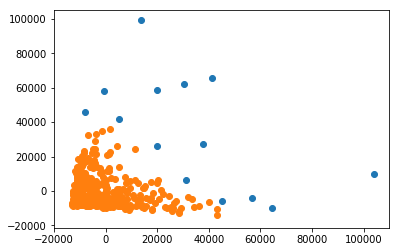

In [23]:
# Separando os outliers do restante do grupo
outliers = salesGroup.loc[salesGroup['labels']  == -1]
grupo = salesGroup.loc[salesGroup['labels']  == 0]

# Construindo o plot
plt.scatter(outliers['x'], outliers['y'])
plt.scatter(grupo['x'], grupo['y'])

plt.show()

Podemos ser ainda mais rigorosos e considerar como outliers os pontos que não estão tão agrupados, bastando para isso diminuir o parâmetros `eps` e `min_samples`.